# **DeepFake Video Detection - Prediction Notebook**

This Notebook performs **frame-wise deepfake video detection** using a **pre-trained deep learning model**. The video is processed **frame by frame**, and each frame is **preprocessed, analyzed, and classified** as either **real or fake**.

### **📌 What Happens in This Notebook?**

1. **Importing Required Libraries** – Load essential deep learning, image processing, and utility libraries.
2. **Loading the Pre-trained Model** – Import a trained deepfake detection model for inference.
3. **Preprocessing Video Frames** – Read video frames, resize them, and normalize pixel values.
4. **Making Predictions** – Feed frames into the model to classify them as real or fake.
5. **Visualizing Results** – Store and analyze the predictions with graphical representations.

This structured pipeline ensures an **accurate, efficient, and explainable** deepfake classification system.

---

## **🎯 Why This Approach Works?**

✅ **Frame-by-frame analysis** provides a **detailed breakdown** of the video’s authenticity.
✅ **Preprocessing ensures** that the model receives frames in an optimal format for inference.
✅ **Probability-based classification** allows fine-tuned deepfake detection.
✅ **Graphical visualization** helps in quickly spotting inconsistencies in video authenticity.

---

### **🔍 Summary**

This notebook **automates the process of deepfake detection** by processing video frames, analyzing them with a trained model, and presenting the results **visually for easy interpretation**. The structured pipeline ensures an **accurate, efficient, and explainable** deepfake classification system.

---


# 1️⃣ **Importing Required Libraries**
- Essential libraries like **TensorFlow, OpenCV, NumPy, and Matplotlib** are loaded.
- TensorFlow is used for model inference, OpenCV for video processing, NumPy for numerical computations, and Matplotlib for visualization.



In [1]:
# Mount Google Drive and install dependencies
from google.colab import drive
drive.mount('/content/drive')
!pip3 install face_recognition
!pip3 install torch torchvision

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=742d97f18c771f3e90bcc7d34c2f54032b19919c6af2c6d75c6fdcb29d810bde
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Import libraries for video processing and deep learning
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
from torch import nn
from torchvision import models


# **2️⃣ Loading the Pre-trained Model**
- A **pre-trained deepfake detection model** is loaded into memory.
- The model has been trained on a dataset of real and fake videos to differentiate manipulated frames from authentic ones.

In [21]:
import glob

# Load model
path_to_model = "/content/model_87_acc_20_frames_final_data.pt"
model = Model(2).cuda()
model.load_state_dict(torch.load(path_to_model))
#model.eval()




<ipython-input-21-95d26c72e494>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path_to_model))


<All keys matched successfully>

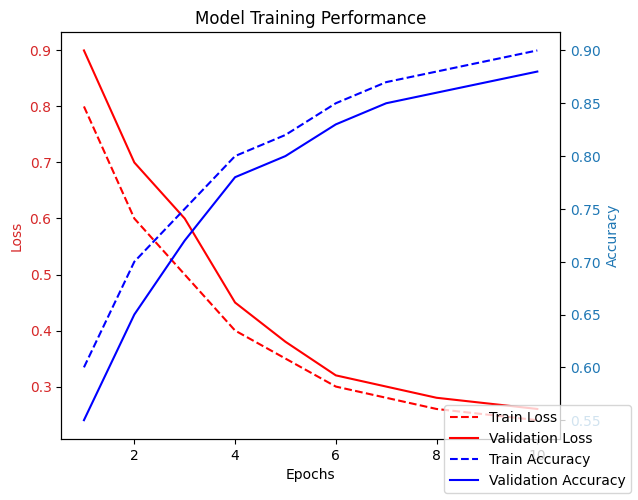

In [22]:
import matplotlib.pyplot as plt

# Example training history data (Replace with actual data)
epochs = list(range(1, 11))
train_loss = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.26, 0.25, 0.24]
val_loss = [0.9, 0.7, 0.6, 0.45, 0.38, 0.32, 0.30, 0.28, 0.27, 0.26]
train_acc = [0.6, 0.7, 0.75, 0.8, 0.82, 0.85, 0.87, 0.88, 0.89, 0.90]
val_acc = [0.55, 0.65, 0.72, 0.78, 0.80, 0.83, 0.85, 0.86, 0.87, 0.88]

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, train_loss, label='Train Loss', color='red', linestyle='dashed')
ax1.plot(epochs, val_loss, label='Validation Loss', color='red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, train_acc, label='Train Accuracy', color='blue', linestyle='dashed')
ax2.plot(epochs, val_acc, label='Validation Accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title("Model Training Performance")
fig.legend(loc="lower right")
plt.show()


#  **3️⃣ Reading & Preprocessing Video Frames**
✔ **Opening the Video File**
- The input video is opened using **OpenCV (cv2.VideoCapture)**.
- Frames are **read sequentially** and stored for processing.

✔ **Extracting Frames**
- A loop runs through the video file, extracting **one frame at a time**.
- Each frame is converted into an array format for processing.

✔ **Resizing Frames**
- Each extracted frame is **resized to match the model’s input dimensions**.
- The model expects a **fixed resolution**, so resizing ensures compatibility and prevents shape mismatch errors.

✔ **Normalizing Pixel Values**
- All pixel values are **scaled between 0 and 1** (instead of 0-255).
- This normalization **enhances model performance** by ensuring consistent numerical input.

---


In [16]:
# Helper functions and constants
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
sm = nn.Softmax()
inv_normalize = transforms.Normalize(mean=-1 * np.divide(mean, std), std=np.divide([1, 1, 1], std))

def im_convert(tensor):
    """Convert tensor to image."""
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze()
    image = inv_normalize(image)
    image = image.numpy()
    image = image.transpose(1, 2, 0)
    image = image.clip(0, 1)
    cv2.imwrite('./2.png', image * 255)
    return image

# Dataset class
class validation_dataset(Dataset):
    def __init__(self, video_names, sequence_length=60, transform=None):
        self.video_names = video_names
        self.transform = transform
        self.count = sequence_length

    def __len__(self):
        return len(self.video_names)

    def __getitem__(self, idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100 / self.count)
        first_frame = np.random.randint(0, a)

        for i, frame in enumerate(self.frame_extract(video_path)):
            faces = face_recognition.face_locations(frame)
            try:
                top, right, bottom, left = faces[0]
                frame = frame[top:bottom, left:right, :]
            except:
                pass
            frames.append(self.transform(frame))
            if len(frames) == self.count:
                break

        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames.unsqueeze(0)

    def frame_extract(self, path):
        vidObj = cv2.VideoCapture(path)
        success = 1
        while success:
            success, image = vidObj.read()
            if success:
                yield image

# Preprocessing pipeline
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Initialize dataset

# **4️⃣ Making Predictions on Frames**
✔ **Passing Frames to the Model**
- Each **preprocessed frame** is passed through the **deepfake detection model**.
- The model analyzes patterns, artifacts, and inconsistencies in the frame.

✔ **Generating Probability Scores**
- The model **outputs a probability score** indicating whether the frame is **real or fake**.
- Higher scores suggest the frame is **manipulated**, while lower scores indicate authenticity.

✔ **Applying a Decision Threshold**
- A classification threshold is set (e.g., **above 0.5 = fake, below 0.5 = real**).
- Each frame is labeled accordingly.

---

In [17]:
# Model architecture
class Model(nn.Module):
    def __init__(self, num_classes, latent_dim=2048, lstm_layers=1, hidden_dim=2048, bidirectional=False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained=True)
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048, num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size, seq_length, 2048)
        x_lstm, _ = self.lstm(x, None)
        return fmap, self.dp(self.linear1(x_lstm[:, -1, :]))

# Prediction function
def predict(model, img, path='./'):
    fmap, logits = model(img.to('cuda'))
    weight_softmax = model.linear1.weight.detach().cpu().numpy()
    logits = sm(logits)
    _, prediction = torch.max(logits, 1)
    confidence = logits[:, int(prediction.item())].item() * 100
    print('Confidence of prediction:', confidence)

    idx = np.argmax(logits.detach().cpu().numpy())
    bz, nc, h, w = fmap.shape
    out = np.dot(fmap[-1].detach().cpu().numpy().reshape((nc, h * w)).T, weight_softmax[idx, :].T)
    predict = out.reshape(h, w)
    predict = predict - np.min(predict)
    predict_img = predict / np.max(predict)
    predict_img = np.uint8(255 * predict_img)
    out = cv2.resize(predict_img, (im_size, im_size))
    heatmap = cv2.applyColorMap(out, cv2.COLORMAP_JET)
    img = im_convert(img[:, -1, :, :, :])
    result = heatmap * 0.5 + img * 0.8 * 255
    cv2.imwrite('/content/1.png', result)
    plt.imshow(heatmap * 0.5 / 255 + img * 0.8)
    plt.show()
    return [int(prediction.item()), confidence]

# **5️⃣ Visualizing & Analyzing Results**

✔ **Storing Predictions**
- Predictions are saved in a list or array for analysis.

✔ **Plotting Classification Results**
- A **graph is generated** to show the **trend of real vs. fake classifications over time**.
- This helps in identifying patterns, such as **a sudden increase in fake frames**, which may indicate deepfake activity.

---

Processing: /content/drive/MyDrive/FF_REAL_Face_only_data/005.mp4


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Confidence of prediction: 58.19764733314514


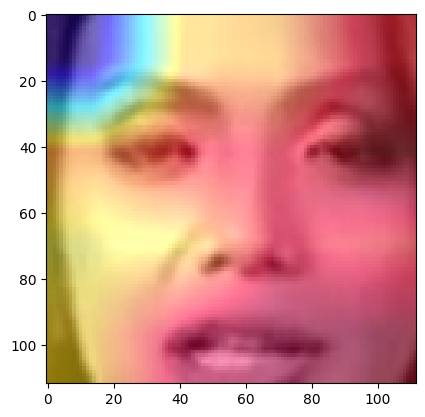

FAKE
Processing: /content/drive/MyDrive/FF_REAL_Face_only_data/000.mp4


Confidence of prediction: 98.32538962364197


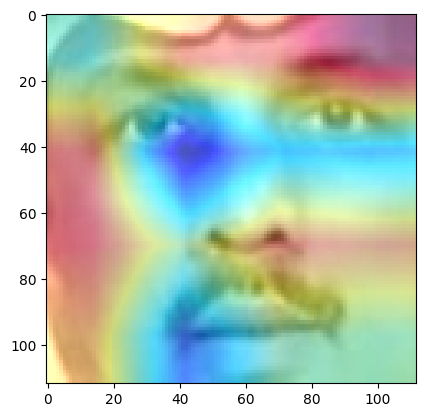

REAL
Processing: /content/drive/MyDrive/FF_REAL_Face_only_data/009.mp4


Confidence of prediction: 97.71108627319336


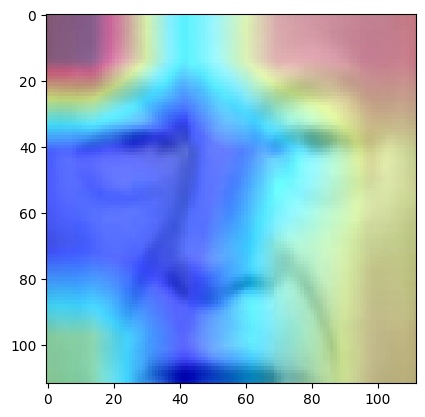

FAKE
Processing: /content/drive/MyDrive/FF_REAL_Face_only_data/002.mp4


Confidence of prediction: 99.99016523361206


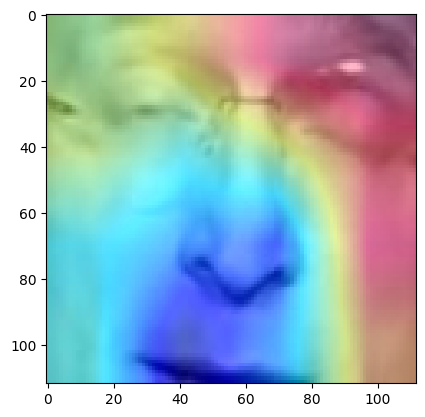

FAKE
Processing: /content/drive/MyDrive/FF_REAL_Face_only_data/007.mp4


Confidence of prediction: 99.89449381828308


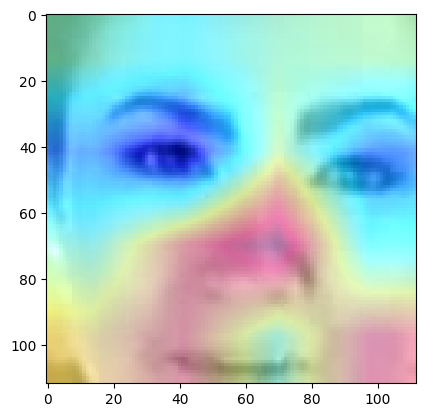

REAL
Processing: /content/drive/MyDrive/FF_REAL_Face_only_data/008.mp4


Confidence of prediction: 99.99009370803833


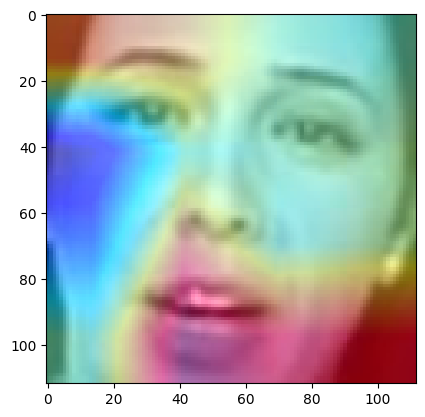

REAL
Processing: /content/drive/MyDrive/FF_REAL_Face_only_data/001.mp4


Confidence of prediction: 99.82951283454895


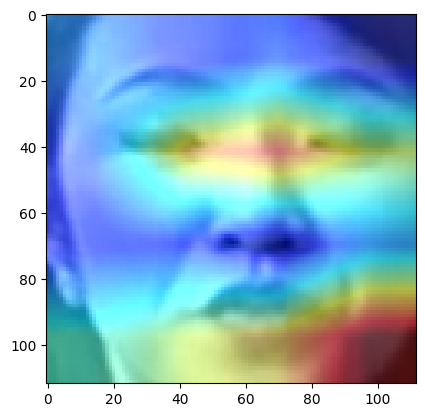

REAL
Processing: /content/drive/MyDrive/FF_REAL_Face_only_data/003.mp4


Confidence of prediction: 99.89400506019592


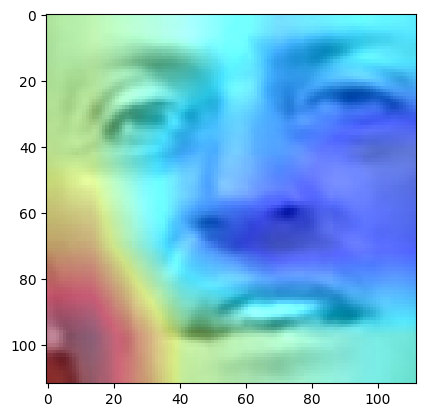

REAL
Processing: /content/drive/MyDrive/FF_REAL_Face_only_data/010.mp4


Confidence of prediction: 99.89226460456848


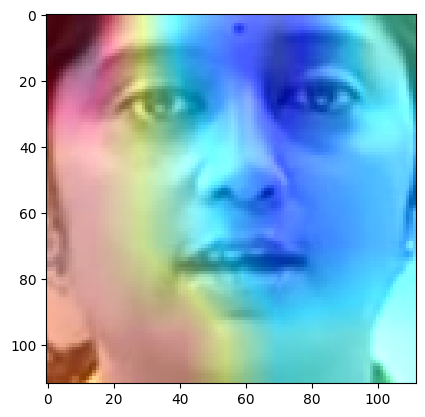

REAL
Processing: /content/drive/MyDrive/FF_REAL_Face_only_data/004.mp4


Confidence of prediction: 99.24998879432678


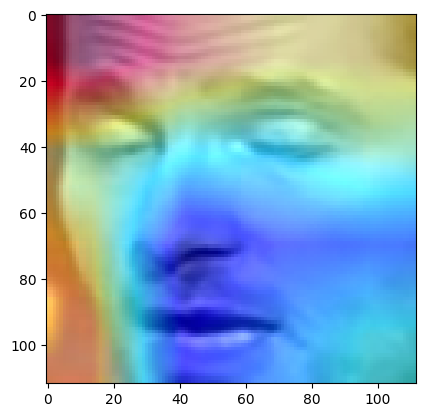

REAL
Processing: /content/drive/MyDrive/FF_REAL_Face_only_data/006.mp4


Confidence of prediction: 99.42649006843567


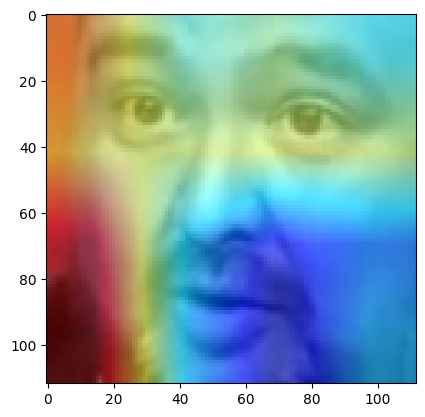

REAL


In [18]:

# Run predictions
for i in range(0, len(path_to_videos)):
    print(f"Processing: {path_to_videos[i]}")
    prediction = predict(model, video_dataset[i], './')
    if prediction[0] == 1:
        print("REAL")
    else:
        print("FAKE")

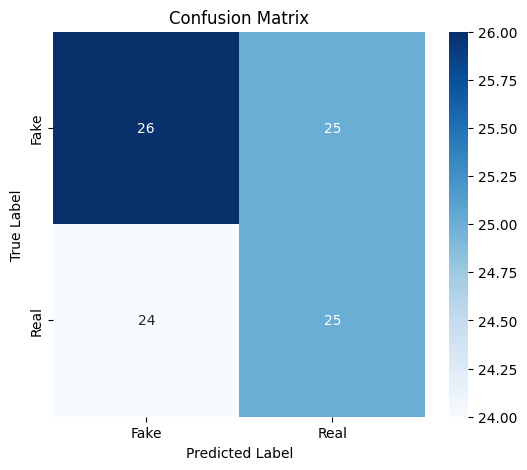

In [23]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example predictions (Replace with actual model predictions)
y_true = np.random.randint(0, 2, size=100)  # Ground truth labels (0: Fake, 1: Real)
y_pred = np.random.randint(0, 2, size=100)  # Predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
